In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Преобразование Бокса-Кокса

Если случайная величина имеет логнормальное распределение, то ее логарифм имеет нормальное распределение.

In [ ]:
data_log = pd.Series(np.random.lognormal(0, 1, 1000))

<AxesSubplot:>

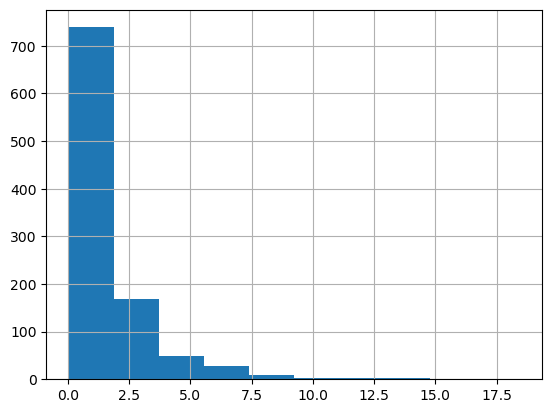

In [ ]:
data_log.hist()

<AxesSubplot:>

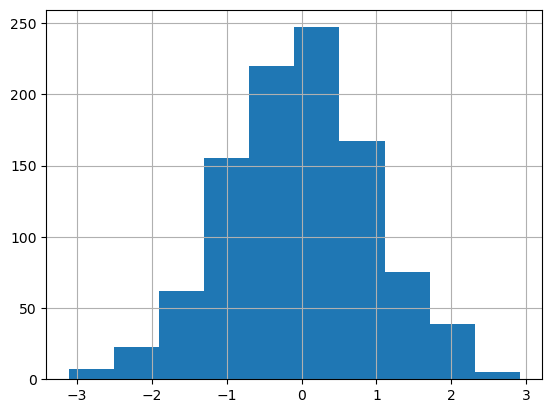

In [ ]:
np.log(data_log).hist()

Почему это работает?

C:\Users\kotenok\AppData\Local\Temp\ipykernel_9236\1053908252.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


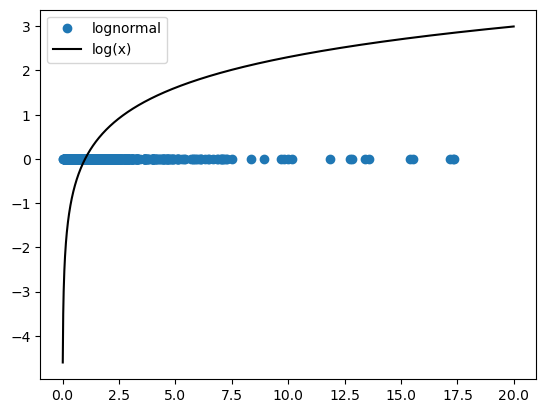

In [ ]:
log_x = np.arange(0.01, 20, 0.01)
log_y = np.log(log_x)

x_points = data
y_points = np.zeros(1000)

fig = plt.figure()
plt.plot(x_points, y_points, 'o', label="lognormal")
plt.plot(log_x, log_y, 'black', label='log(x)')

plt.legend()

fig.show()

Если экспоненциальное распределение?

In [ ]:
data_exp = pd.Series(np.random.exponential(size=1000))

<AxesSubplot:>

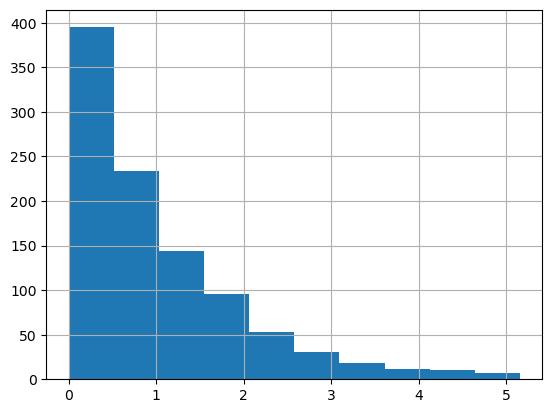

In [ ]:
data_exp.hist()

<AxesSubplot:>

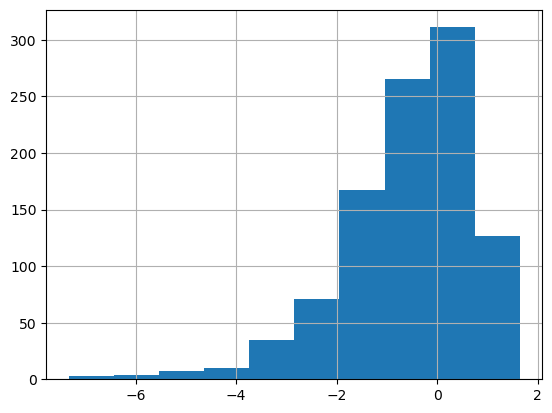

In [ ]:
np.log(data).hist()

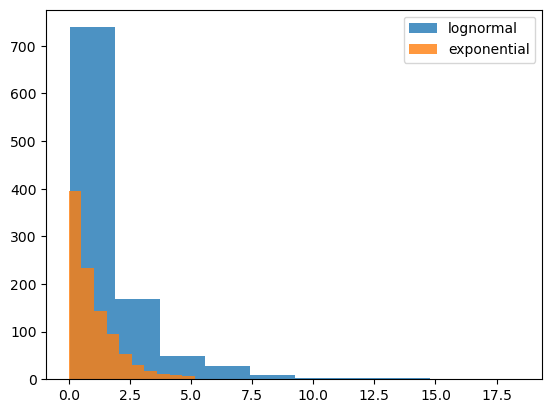

In [ ]:
plt.hist(data_log, label='lognormal', alpha=.8)
plt.hist(data_exp, label='exponential', alpha=.8)
plt.legend()

plt.show()

Найдем такое преобразование.

$$\int\frac{1}{x^{1-\lambda}}=\frac{x^\lambda-1}{\lambda}+C,$$
где $\lambda$ - искомый параметр.

$$x^*_i=\begin{cases}
\ln(x), & \lambda=0 \\
\frac{x^\lambda-1}{\lambda}, & \text{в обратном случае.}
\end{cases}$$

In [ ]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data_exp)

<AxesSubplot:>

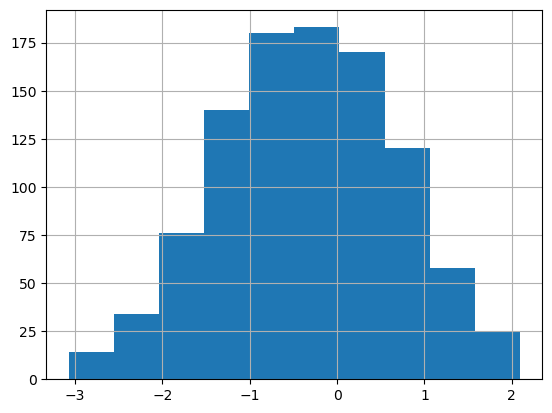

In [ ]:
pd.Series(transformed_data).hist()

In [ ]:
best_lambda

0.2852685285187582

# Отбор признаков

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [8]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [40]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<Axes: xlabel='engine-type', ylabel='Count'>

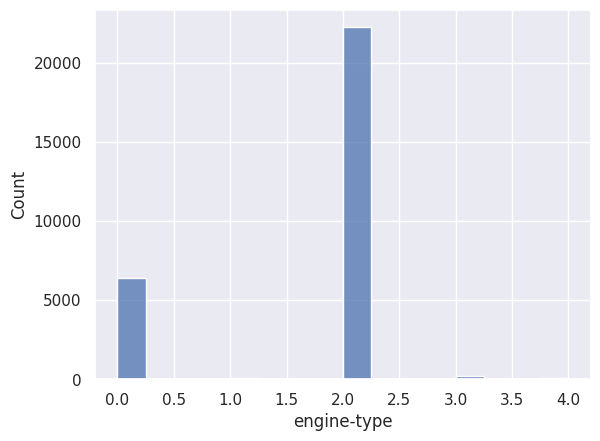

In [41]:
sns.histplot(data=train_X, x='engine-type')

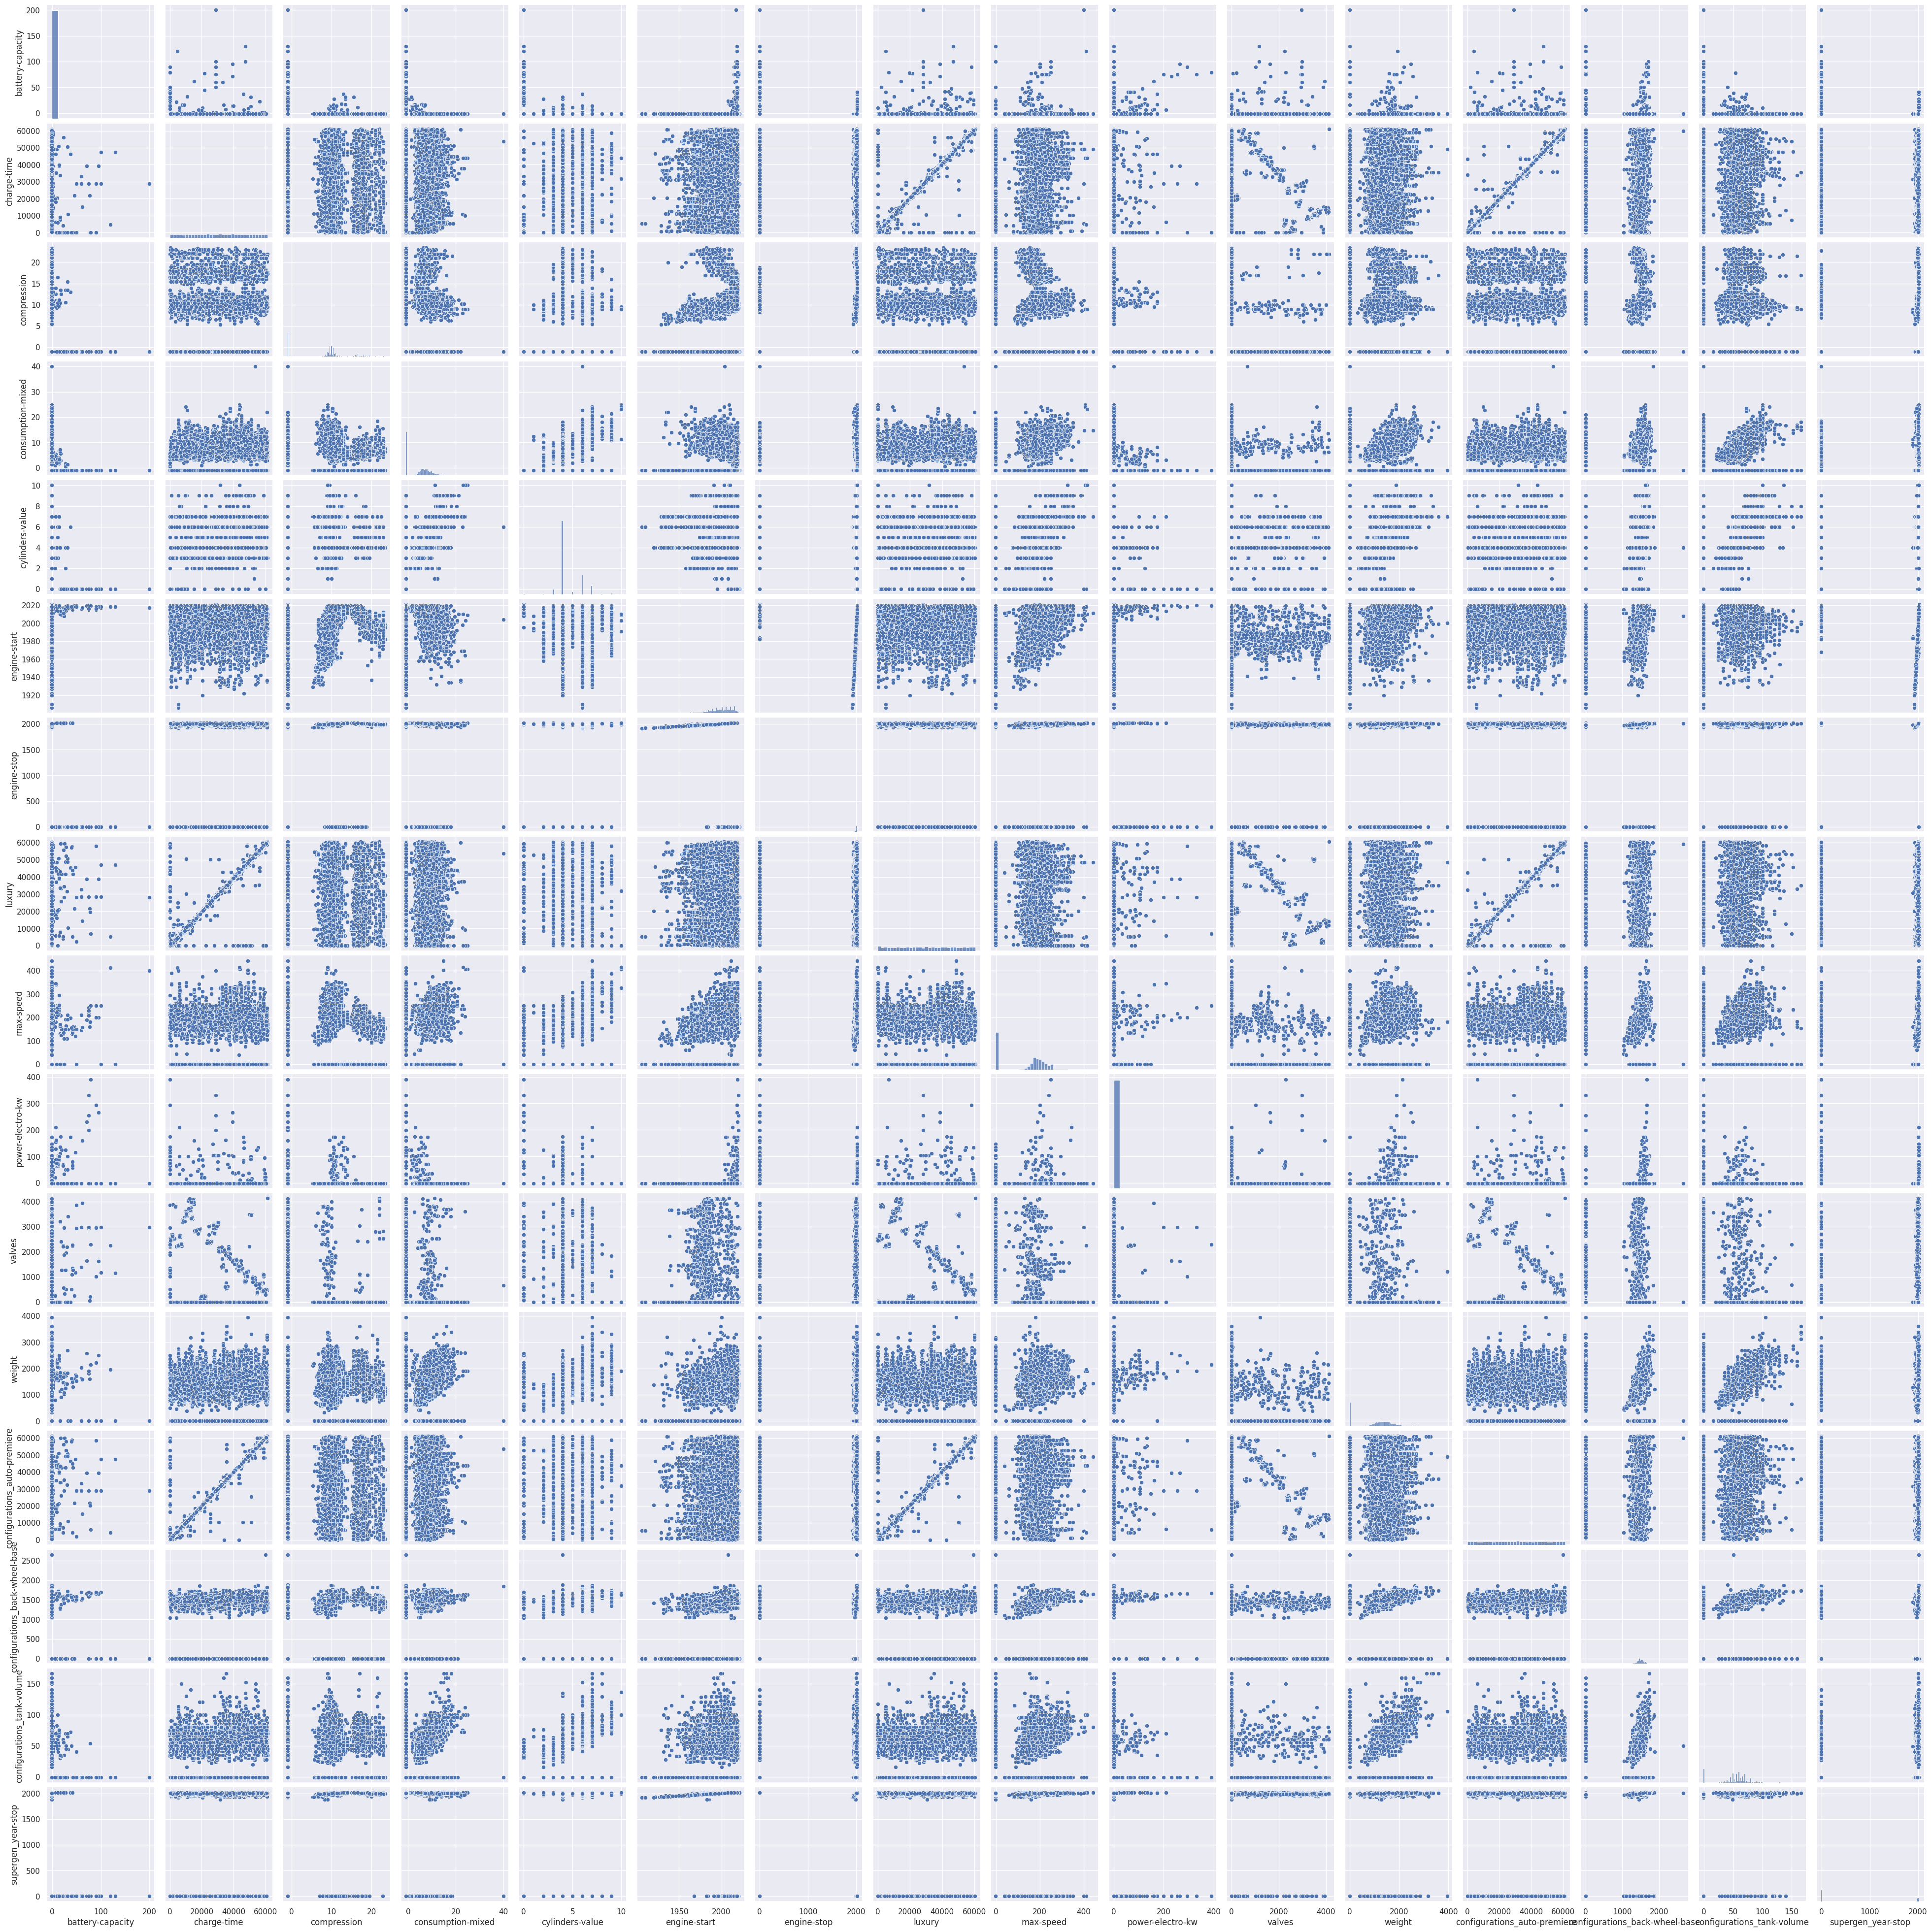

In [44]:
sns.pairplot(train_X[numerical]);

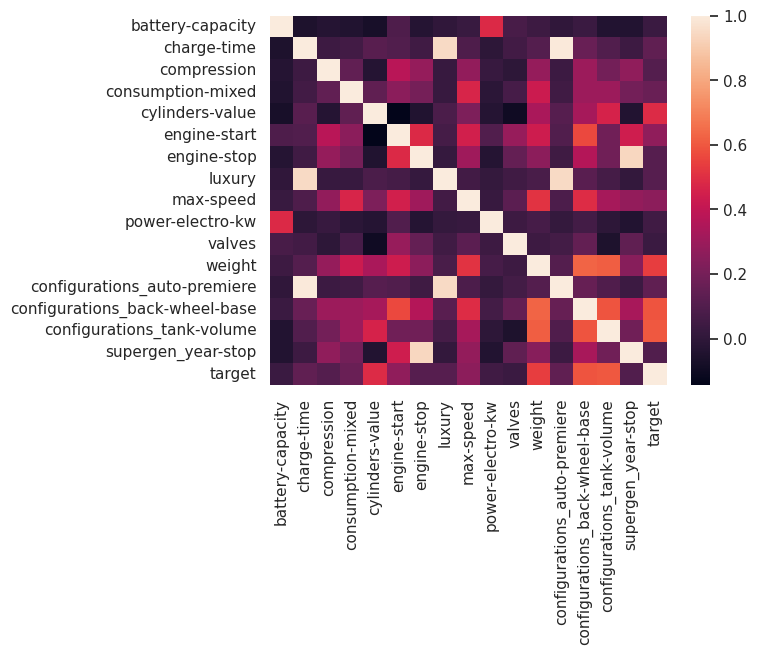

In [46]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [47]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.11003752360955589 p-value: 9.725646829239856e-79


In [73]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667099614 p-value: 5.610547363610232e-05


## F-test

In [64]:
from sklearn.feature_selection import f_regression, SelectKBest

In [61]:
f_statistic, p_values = f_regression(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 1.00000000e+000])

In [69]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  2.0000e+03,
         1.6000e+01,  0.0000e+00],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  1.9960e+03,
         2.3000e+01,  0.0000e+00],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  2.0120e+03,
         1.0000e+01,  0.0000e+00],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ..., -1.0000e+00,
         2.6000e+01,  0.0000e+00],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.9950e+03,
         1.6000e+01,  0.0000e+00],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  2.0070e+03,
         3.5000e+01,  0.0000e+00]])

In [71]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'valves', 'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial'], dtype=object)

## Значения Шепли

In [ ]:
import shap

In [ ]:
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

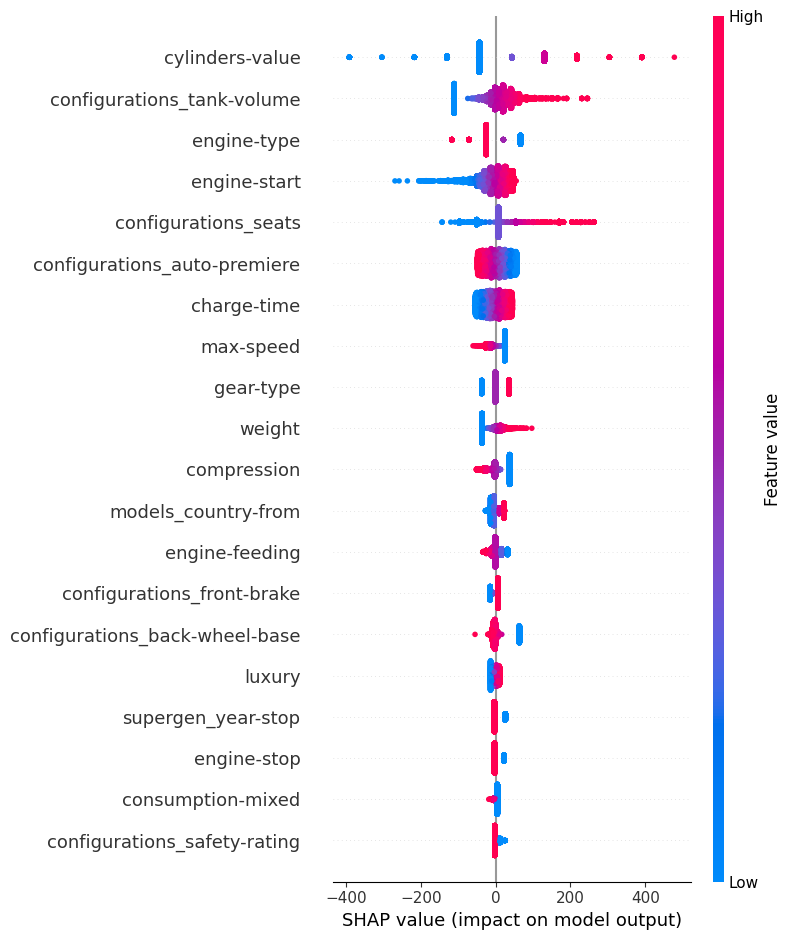

In [ ]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [ ]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

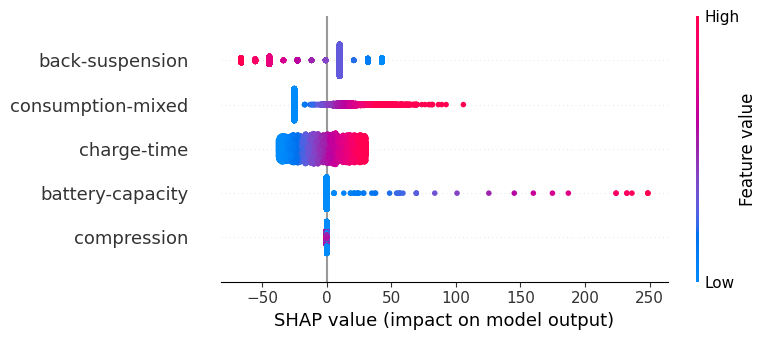

In [ ]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

## Пермутационная важность

In [ ]:
#импорт библиотек
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [ ]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [1]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import shap

C:\Users\potkd\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import PolynomialFeatures

In [18]:
df = pd.read_csv("techparams_train.csv")
df

In [ ]:
X = df.drop(["target", "index"], axis=1)

y = df[["target"]]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
base = reg().fit(train_X, train_y)
base.score(test_X, test_y)

0.46471537322321854

In [20]:
pol = PolynomialFeatures()

In [21]:
train_X = pd.DataFrame(pol.fit_transform(train_X), columns=pol.get_feature_names_out())

test_X = pd.DataFrame(pol.fit_transform(test_X), columns=pol.get_feature_names_out())

In [22]:
model_pol = LinearRegression().fit(train_X, train_y)
model_pol.score(test_X, test_y)

0.6896801078403426

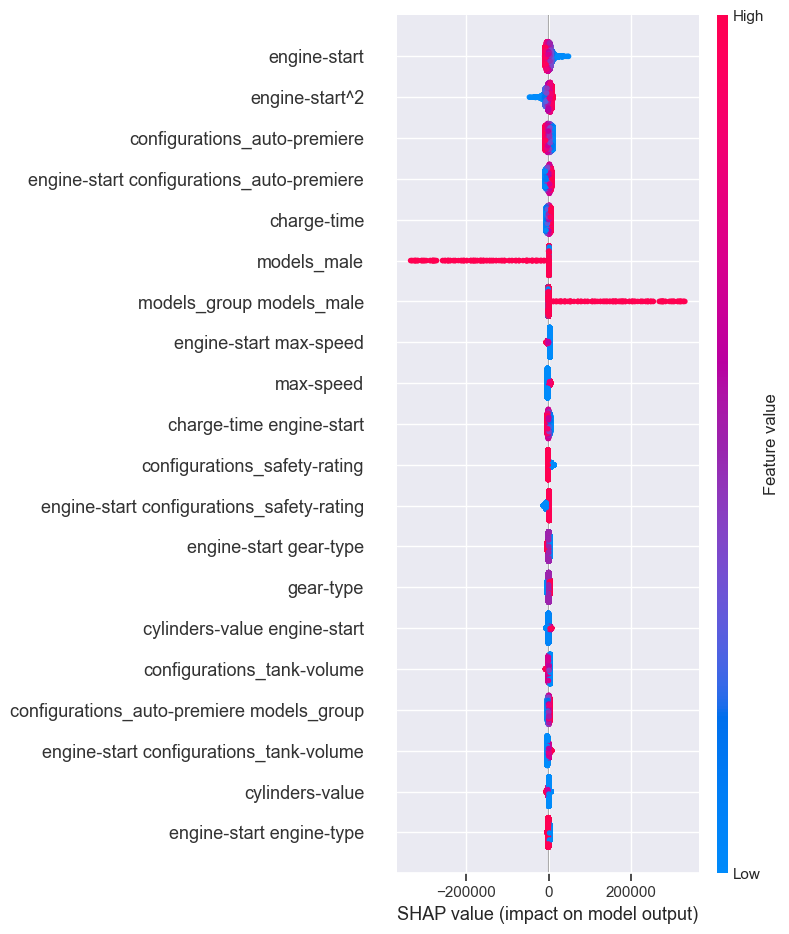

In [23]:
explainer = shap.Explainer(model_pol, train_X)

val_shap = explainer(test_X)

shap.summary_plot(val_shap, test_X)

In [24]:
from sklearn.feature_selection import SelectFromModel

In [25]:
from sklearn.inspection import permutation_importance

In [28]:
result = permutation_importance(model_pol, test_X, test_y)

In [37]:
def scalar_to_list(scalar):
    return[scalar]

In [51]:
pd.DataFrame(dict(zip(test_X.columns, map(scalar_to_list, result.importances_mean)))).T.rename(columns={0: 'value'}).reset_index().sort_values(by='value', ascending=False)

index         value
30                              models_male  13445.018473
492                models_group models_male  13082.838942
9                              engine-start   1538.415242
243                          engine-start^2   1503.109869
20             configurations_auto-premiere   1194.296195
..                                      ...           ...
156         consumption-mixed supply-system     -0.000027
139  compression configurations_tank-volume     -0.000078
42                back-suspension gear-type     -0.000091
224                engine-feeding gear-type     -0.000143
227         engine-feeding power-electro-kw     -0.000162

[496 rows x 2 columns]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [62]:
f_statistic, p_value = f_regression(train_X, train_y)

selector = SelectKBest(f_regression, k=500)

train_X = pd.DataFrame(selector.fit_transform(train_X, train_y), columns=selector.get_feature_names_out())

test_X = pd.DataFrame(selector.transform(test_X), columns=selector.get_feature_names_out())

C:\Users\potkd\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\potkd\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=500 is greater than n_features=496. All the features will be returned.
  warnings.warn(
C:\Users\potkd\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
model_fin = LinearRegression().fit(train_X, train_y)

In [65]:
model_fin.score(test_X, test_y)

0.689679997323508